<a href="https://colab.research.google.com/github/evan15900/Lee113/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 專案報告: LINE Bot 日本動畫推薦機器人(ID: @684dgomj)

## 專案背景與動機

### 專案背景  
日本動畫近年在台灣愈來愈熱門，一些作品造成相當大的話題性，連原本不常接觸二次元的人也開始感興趣，顯然看動畫、漫畫已經不是「宅宅」的專屬了。還記得老師在課堂上提過幾個作品，雖然看起來大家都沒看過，但我相信很多人只是害羞不表態而已。而本報告將使用大眾化的聊天軟體 LINE ，以機器人的形式推薦數個相當優秀的動畫作品，省去使用者要搜索不同網站來查看相關資訊的麻煩。

### 專案目標  
- 以 Rich Menu 介面讓使用者一目瞭然當前有哪些推薦作品。
- 用 ButtonsTemplate 提供作品介紹、名台詞、網路評價、正版免費觀看管道（如果沒有則不提供），使人快速認識該作品並判斷是否有興趣。    
- 預期成果為一個操作簡單的動畫推薦機器人，不用再到搜尋引擎查找，僅需點擊按鈕即可獲得經過整理的推薦資訊。

## 系統設計與架構



### 系統功能分析  

| 功能項目 | 說明 |
|----------|------|
| 使用者操作接收 | 使用者透過在 Rich Menu 和 ButtonsTemplate 上傳遞文字指令，或者直接在 LINE 聊天室傳送訊息，Bot 將會接收並處理。 |
| 瀏覽作品 | Bot 收到從 Rich Menu 傳來的作品選擇後，會產生對應 ButtonsTemplate 提供更多的資訊給使用者。 |
| 介紹 | 點擊該按鈕會將使用者引導至介紹更詳細的網站。 |
| 名台詞 | 點擊該按鈕會回傳數個該作品的名台詞。 |
| 評價 | 點擊該按鈕會將使用者引導至含有該作品評價、觀後心得的網站。 |
| 正版免費觀看管道 | 點擊該按鈕會將使用者引導至能免費觀看該作品的正版網站，若無觀看管道則讓使用者自動回傳對應文字。 |
| 錯誤排除 | 若輸入無法識別的訊息，Bot 會回覆一個預設的文字訊息。 |

### 系統架構圖


### 使用技術  

| 技術項目 | 說明 |
|----------|------|
| 程式語言 | Python |
| 框架 | Flask（建立 webhook） |
| 部署平台 | Versel |
| API 使用 | LINE Messaging API（對話） |
| 資料格式 | JSON 處理傳輸與接收資料 |

## 專案成果與效益

### 系統程式

In [ ]:
from flask import Flask, request, abort
import os
from linebot.v3 import WebhookHandler
from linebot.v3.exceptions import InvalidSignatureError
from linebot.v3.webhooks import MessageEvent, TextMessageContent
from linebot.v3.messaging import (
    Configuration, ApiClient, MessagingApi,
    ReplyMessageRequest,
    TextMessage,
    TemplateMessage,
    ButtonsTemplate,
    URIAction,
    MessageAction
)

app = Flask(__name__)

configuration = Configuration(access_token=os.getenv('LINE_Channel_access_token'))
line_handler = WebhookHandler(os.getenv('LINE_Channel_secret'))

@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    try:
        line_handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'

@line_handler.add(MessageEvent, message=TextMessageContent)
def handle_message(event):
    with ApiClient(configuration) as api_client:
        line_bot_api = MessagingApi(api_client)

        action = event.message.text
        if action == '魔法少女小圓':
          template_MM = ButtonsTemplate(
              thumbnail_image_url='https://animeheaven.de/wp-content/uploads/2019/03/MadokaMagica.jpg',
              title="魔法少女小圓(2011)",
              text="由SHAFT製作虛淵玄編劇，唯一同時獲得日本動畫指標性三大獎的動畫，也是最賣座且最重要的作品之一，後有劇場版與外傳。",
              actions=[
                URIAction(label="介紹", uri="https://zh.moegirl.org.cn/zh-tw/%E9%AD%94%E6%B3%95%E5%B0%91%E5%A5%B3%E5%B0%8F%E5%9C%86"),
                MessageAction(label='名台詞', text='魔法少女小圓名台詞(不據透)'),
                URIAction(label="網路評價", uri="https://www.stockwich.com/2023/08/18/madoka-magica/"),
                MessageAction(label='正版免費觀看管道', text='魔法少女小圓暫無觀看管道，好想看')
              ]
            )
          reply = TemplateMessage(
              alt_text='作品推薦',
              template=template_MM
          )

        elif action == '命運石之門':
          template_SG = ButtonsTemplate(
              thumbnail_image_url='https://miro.medium.com/v2/resize:fit:600/1*swXnbmu1OzhvVypMeEDqPA.jpeg',
              title="命運石之門(2011)",
              text="由WHITE FOX製作的動畫，改編自5pb.所製作的一系列視覺小說遊戲，後有續作「命運石之門0」與劇場版。",
              actions=[
                URIAction(label="介紹", uri="https://zh.moegirl.org.cn/zh-tw/%E5%91%BD%E8%BF%90%E7%9F%B3%E4%B9%8B%E9%97%A8%E7%B3%BB%E5%88%97"),
                MessageAction(label='名台詞', text='命運石之門名台詞(不據透)'),
                URIAction(label="網路評價", uri="https://www.dcard.tw/f/acg/p/242283430"),
                MessageAction(label='正版免費觀看管道', text='命運石之門暫無觀看管道，好想看')
              ]
            )
          reply = TemplateMessage(
              alt_text='作品推薦',
              template=template_SG
          )

        elif action == '孤獨搖滾':
          template_BTR = ButtonsTemplate(
              thumbnail_image_url='https://cdn.donmai.us/sample/b2/a4/__gotoh_hitori_kita_ikuyo_ijichi_nijika_and_yamada_ryo_bocchi_the_rock_drawn_by_kerorira__sample-b2a458532214cc1c7190b8f709b24d4c.jpg',
              title="孤獨搖滾(2022)",
              text="由CloverWorks製作的動畫，改編自濱路晶的同名漫畫。講述內向女學生與三名性格各異的少女結識並攜手完成樂團夢想。",
              actions=[
                URIAction(label="介紹", uri="https://zh.wikipedia.org/zh-tw/%E5%AD%A4%E7%8D%A8%E6%90%96%E6%BB%BE%EF%BC%81_(%E5%8B%95%E7%95%AB)"),
                MessageAction(label='名台詞', text='孤獨搖滾名台詞(不據透)'),
                URIAction(label="網路評價", uri="https://www.dcard.tw/f/acg/p/240685542"),
                URIAction(label="正版免費觀看管道", uri="https://ani.gamer.com.tw/animeVideo.php?sn=31599")
              ]
            )
          reply = TemplateMessage(
              alt_text='作品推薦',
              template=template_BTR
          )

        elif action == '比宇宙更遠的地方':
          template_FTU = ButtonsTemplate(
              thumbnail_image_url='https://truth.bahamut.com.tw/s01/202402/8603ecdb498a1a061ec48219a96508fd.JPG',
              title="比宇宙更遠的地方(2018)",
              text="由MADHOUSE製作的原創TV動畫，講述前往南極旅行的女高中生們的故事。",
              actions=[
                URIAction(label="介紹", uri="https://zh.moegirl.org.cn/zh-tw/%E6%AF%94%E5%AE%87%E5%AE%99%E6%9B%B4%E8%BF%9C%E7%9A%84%E5%9C%B0%E6%96%B9"),
                MessageAction(label='名台詞', text='比宇宙更遠的地方名台詞(不據透)'),
                URIAction(label="網路評價", uri="https://acg.gamer.com.tw/commentList.php?acg_sn=92450"),
                URIAction(label="正版免費觀看管道", uri="https://www.youtube.com/playlist?list=PLC18xlbCdwtQaJ1X7OBHj3-AY7EN7WUJb")
              ]
            )
          reply = TemplateMessage(
              alt_text='作品推薦',
              template=template_FTU
          )

        elif action == '魔法少女小圓名台詞(不據透)':
          reply = TextMessage(
              text='1.要是別人說懷有希望是錯誤的事，不管幾次我都一定會否定這句話，不管到什麼時候。\n\n2.奇蹟與魔法都是存在的。\n\n3.只為自己而活的話，所有東西都由自己來承擔。\n\n4.已經沒有什麼好怕的了。\n\n5.這才是人類情感的極致，比希望更火熱，比絕望更深切的東西......是愛。'
              )

        elif action == '命運石之門名台詞(不據透)':
          reply = TextMessage(
              text='1.就算知道方法，也絕對不能去改變過去，絕不能將存在的可能性轉變為既定的現實，未來是沒有人能預測的，是無法重來的，正因如此人們才能接受各種痛苦、不幸與飛來橫禍，邁步前進。\n\n2.時間會隨著人的感覺而變長或變短，相對論真是既浪漫又傷感的東西呢。\n\n3.你的一秒，將成為我的永遠。\n\n4.不管在哪條世界線你都不是一個人，不管在哪條世界線我都一定會找到你，我會不斷的觀測著你，就像你一直在觀測我一樣'
              )

        elif action == '孤獨搖滾名台詞(不據透)':
          reply = TextMessage(
              text='1.現實很可怕，但我有預感，接下來有好多有趣的事在等著我。\n\n2.今後也讓我們好好見識吧，小孤獨的搖滾，你的「孤獨搖滾」。\n\n3.形形色色的個性匯聚，那就會成為一首音樂，成為團結Band的特色。\n\n4.要是捨棄了個性，那就跟死了沒區別。'
              )

        elif action == '比宇宙更遠的地方名台詞(不據透)':
          reply = TextMessage(
              text='1.當你無法回頭的時候，才是真正的旅行。\n\n2.多管閒事不是體貼人，有時不管也是種體貼。\n\n3.在看到陌生的景色前，一直走下去吧！因為無論走到何處，世界都很廣闊。\n\n4.信念堅定和固執己見只有一線之隔。\n\n5.每天倒映在眼中的風景，正在應接不暇的轉變，這正是我們未曾經歷的青春。'
              )

        else:
          reply = TextMessage(text='請在選單上選擇一個作品')

        line_bot_api.reply_message(
            ReplyMessageRequest(
                reply_token=event.reply_token,
                messages=[
                    reply
                ]
            )
        )


if __name__ == "__main__":
    app.run()

### 系統畫面

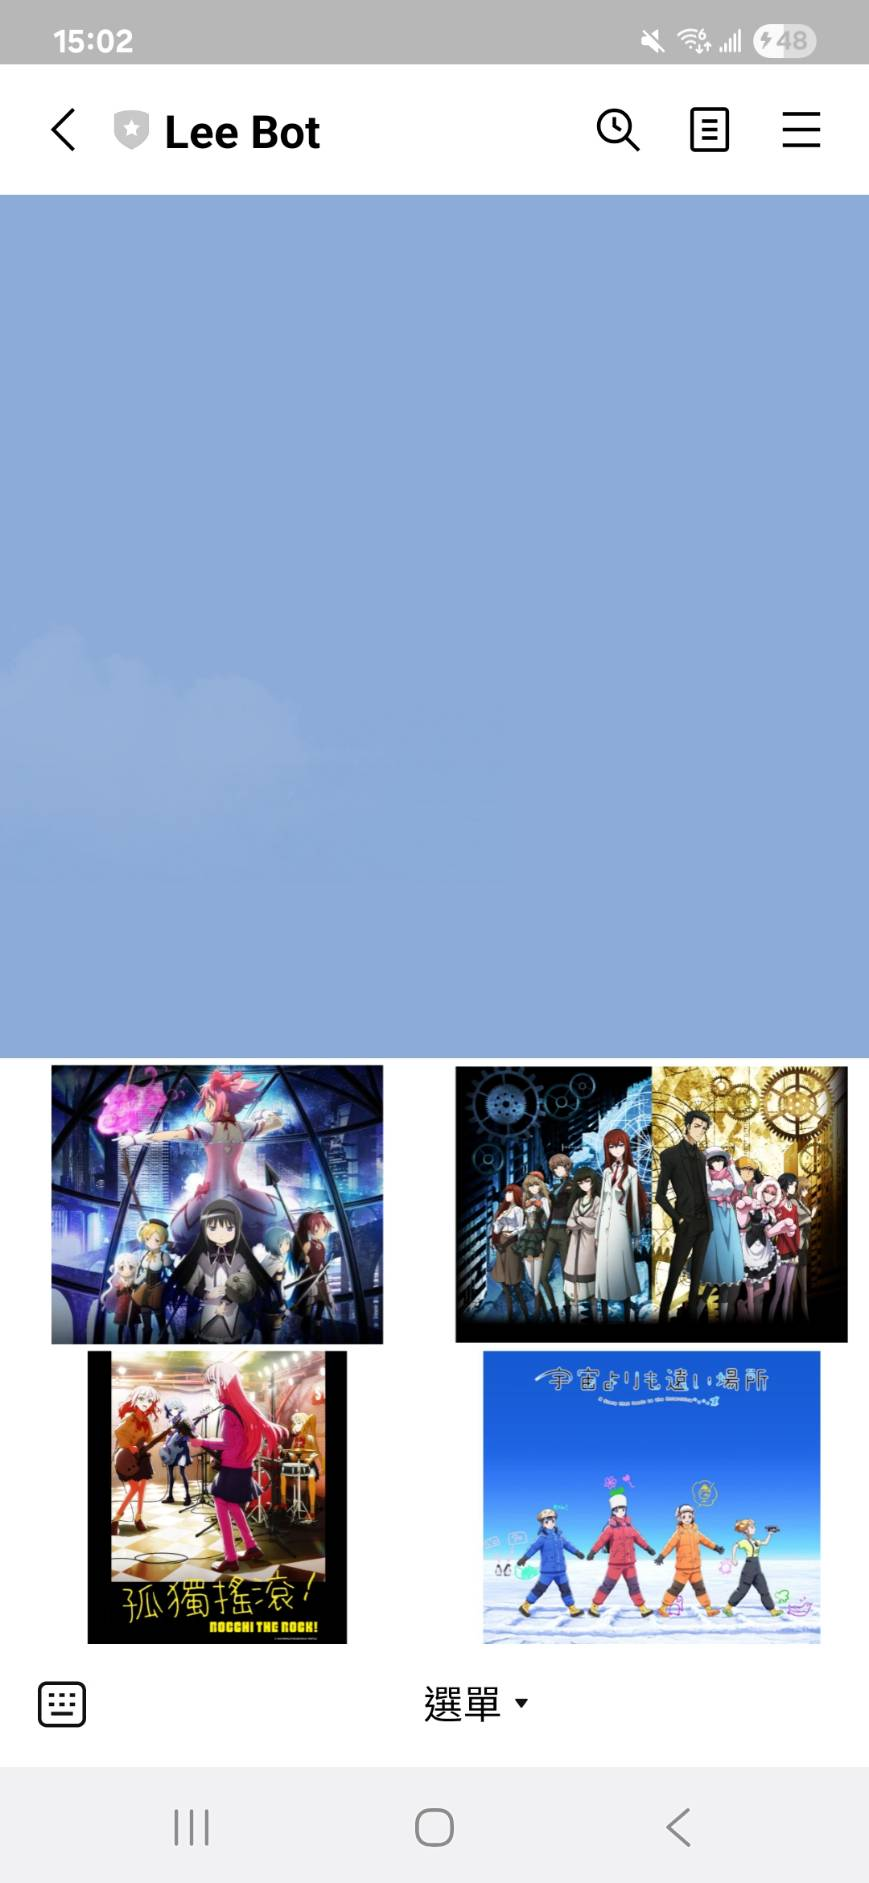
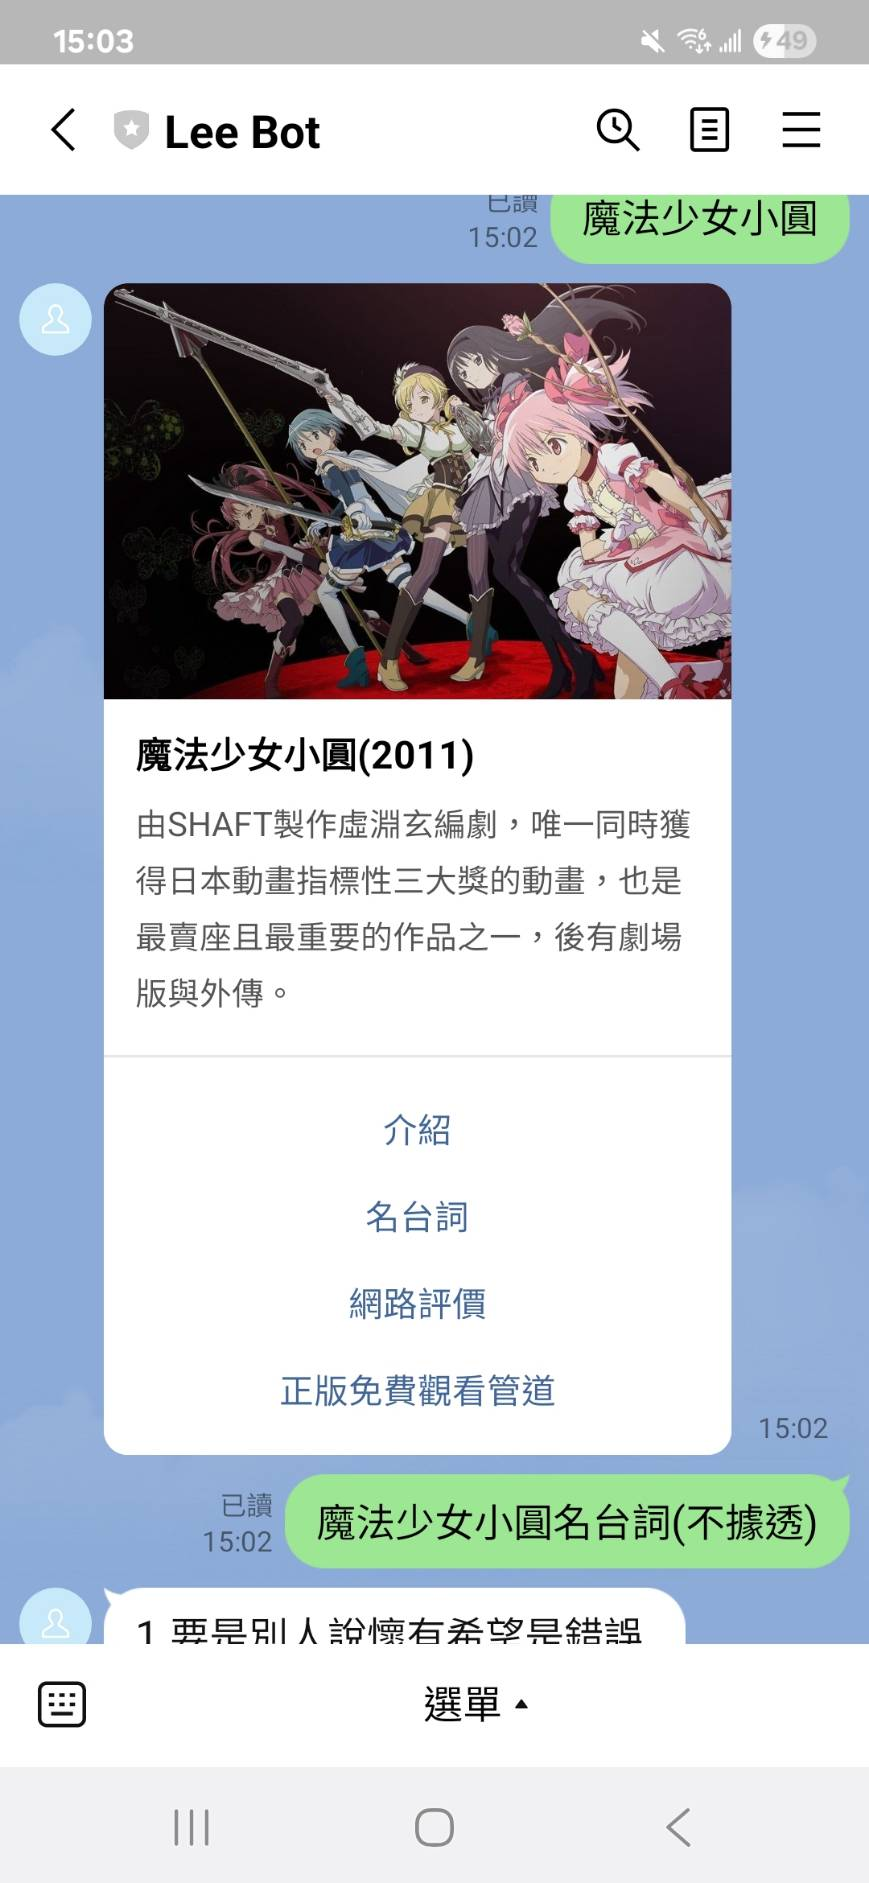


- 使用者於 LINE 選擇 Rich Menu 上的動畫作品
- LINE Bot 提供該作品的 ButtonsTemplate
- 使用者點擊「名台詞」按鈕  
- Bot 回傳該作品的數個名台詞
- 使用者點擊「介紹」按鈕則會跳轉至對應的網頁

### 效益分析

- 使用者測試報告

| 測試項目 | 測試結果 | 備註 |
|----------|----------|------|
| 功能完整性 | 95% 滿意 | 能正常運作提供資訊，有時出現延遲 |
| 界面設計 | 100% 滿意 |  LINE Bot 的界面簡潔且提供圖片 |
| 性能表現 | 平均回應時間 1~4 秒 | 可接受，僅第一次使用時會等待較久 |
| 使用者滿意度 | 平均 4.8/5 | 有些跳轉網頁載入較久 |
| 建議回饋 | 增加推薦作品 | 目前選單上只有四個作品，未來或許可新增更多 |

- 系統是否達到目標？  
是。系統成功讓使用者透過 LINE 獲得選單上四個動畫的更多資訊，符合預期成果。

## 未來發展與改進

### 改進建議  
- 將部分跳轉網頁更改成讀取快速的網站，例如日本官網、官方X(前身為推特)，或是直接回傳網頁的重點截圖。
- 增加推薦作品數量至六到八個，或是每隔一段時間更新推薦的作品。

### 未來規劃  
- 增加投票機制
- 增加介紹影片
- 讓使用者把自己覺得不錯的名台詞也加進去